In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
pd.options.mode.chained_assignment = None 
from IPython.display import display
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# 1) Import all csv.excel files
car_data = pd.read_csv('Car_sales_transactions.csv', sep=",",header = 0, encoding='latin')
sales_status = pd.read_csv('Sales_Status.csv')
city_master = pd.read_excel('City_Master.xlsx')
region = pd.read_excel('Region_Master.xlsx')
region_state = pd.read_excel('Region_State_Mapping.xlsx')
state = pd.read_excel('State_Master.xlsx')
car_data = pd.merge(car_data,city_master[['City_Code','City_Name']],how ='left',on='City_Code')
car_data = pd.merge(car_data,region_state, how ='left',on='State_Code')
car_data = pd.merge(car_data,sales_status, how = 'left', on='Sales_ID')
car_data = pd.merge(car_data,state, how = 'left', on='State_Code')
car_data = pd.merge(car_data,region, how = 'left', on='Region_Code')
car_data.head()

,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,...,Owner,Mileage,Engine,Max_Power,Seats,City_Name,Region_Code,Sold,State_Name,Region
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,...,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Mumbai,R3,Y,Maharashtra,West
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,...,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Ranchi,R2,Y,Jharkhand,East
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,...,Third Owner,17.7 kmpl,1497 CC,78 bhp,5,Noida,R1,Y,Uttar Pradesh,Central
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,CT21,ST27,248001,Diesel,Individual,...,First Owner,23.0 kmpl,1396 CC,90 bhp,5,Dehradun,R1,Y,Uttarakhand,Central
4,5,Maruti Swift VXI BSIII,2007,130000,120000,CT03,ST24,600020,Petrol,Individual,...,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5,Chennai,R4,Y,Tamil Nadu,South


In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 7905
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales_ID       7906 non-null   int64 
 1   Name           7906 non-null   object
 2   Year           7906 non-null   int64 
 3   Selling_Price  7906 non-null   int64 
 4   km_Driven      7906 non-null   int64 
 5   City_Code      7906 non-null   object
 6   State_Code     7906 non-null   object
 7   Postal_Code    7906 non-null   int64 
 8   Fuel           7906 non-null   object
 9   Seller_Type    7906 non-null   object
 10  Transmission   7906 non-null   object
 11  Owner          7906 non-null   object
 12  Mileage        7906 non-null   object
 13  Engine         7906 non-null   object
 14  Max_Power      7906 non-null   object
 15  Seats          7906 non-null   int64 
 16  City_Name      7906 non-null   object
 17  Region_Code    7906 non-null   object
 18  Sold           7906 non-null

In [4]:
car_data['Mileage_float'] = car_data['Mileage'].str[:-5]
car_data['Power'] = car_data['Max_Power'].str[:-4]
car_data['Mileage_float'] = car_data['Mileage_float'].apply(pd.to_numeric)
car_data['Power'] = car_data['Power'].apply(pd.to_numeric)
car_data['Power']
car_data['Engine_cc'] = car_data['Engine'].str.split(pat=" ",expand=True)[0].astype(int)
brand = car_data['Name'].str.split(expand = True)
car_data['Brand'] = brand[0]

In [5]:
car_data.columns

Index(['Sales_ID', 'Name', 'Year', 'Selling_Price', 'km_Driven', 'City_Code',
       'State_Code', 'Postal_Code', 'Fuel', 'Seller_Type', 'Transmission',
       'Owner', 'Mileage', 'Engine', 'Max_Power', 'Seats', 'City_Name',
       'Region_Code', 'Sold', 'State_Name', 'Region', 'Mileage_float', 'Power',
       'Engine_cc', 'Brand'],
      dtype='object')

In [6]:
df_price = car_data.copy()     ##where(car_data['Sold'] =="Y")
df_price.head()

,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,...,Seats,City_Name,Region_Code,Sold,State_Name,Region,Mileage_float,Power,Engine_cc,Brand
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,...,5,Mumbai,R3,Y,Maharashtra,West,23.40,74.00,1248,Maruti
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,...,5,Ranchi,R2,Y,Jharkhand,East,21.14,103.52,1498,Skoda
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,...,5,Noida,R1,Y,Uttar Pradesh,Central,17.70,78.00,1497,Honda
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,CT21,ST27,248001,Diesel,Individual,...,5,Dehradun,R1,Y,Uttarakhand,Central,23.00,90.00,1396,Hyundai
4,5,Maruti Swift VXI BSIII,2007,130000,120000,CT03,ST24,600020,Petrol,Individual,...,5,Chennai,R4,Y,Tamil Nadu,South,16.10,88.20,1298,Maruti


In [7]:
df_price.drop(['Sales_ID','Name','City_Code','State_Code','Postal_Code','Mileage','Engine','Max_Power','Seats','City_Name','Region_Code','State_Name', 'Region'], axis=1, inplace=True)
df_price.columns

Index(['Year', 'Selling_Price', 'km_Driven', 'Fuel', 'Seller_Type',
       'Transmission', 'Owner', 'Sold', 'Mileage_float', 'Power', 'Engine_cc',
       'Brand'],
      dtype='object')

In [8]:
df_price.head()

,Year,Selling_Price,km_Driven,Fuel,Seller_Type,Transmission,Owner,Sold,Mileage_float,Power,Engine_cc,Brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,Y,23.40,74.00,1248,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,Y,21.14,103.52,1498,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,Y,17.70,78.00,1497,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,Y,23.00,90.00,1396,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,Y,16.10,88.20,1298,Maruti


In [9]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 7905
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           7906 non-null   int64  
 1   Selling_Price  7906 non-null   int64  
 2   km_Driven      7906 non-null   int64  
 3   Fuel           7906 non-null   object 
 4   Seller_Type    7906 non-null   object 
 5   Transmission   7906 non-null   object 
 6   Owner          7906 non-null   object 
 7   Sold           7906 non-null   object 
 8   Mileage_float  7906 non-null   float64
 9   Power          7906 non-null   float64
 10  Engine_cc      7906 non-null   int32  
 11  Brand          7906 non-null   object 
dtypes: float64(2), int32(1), int64(3), object(6)
memory usage: 772.1+ KB


In [10]:
final_price_data = pd.get_dummies(df_price, columns =['Fuel','Seller_Type','Transmission','Owner','Sold','Brand'])
final_price_data.head()

,Year,Selling_Price,km_Driven,Mileage_float,Power,Engine_cc,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,...,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Nissan,Brand_Opel,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2014,450000,145500,23.40,74.00,1248,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,370000,120000,21.14,103.52,1498,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2006,158000,140000,17.70,78.00,1497,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2010,225000,127000,23.00,90.00,1396,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2007,130000,120000,16.10,88.20,1298,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
final_price_data.columns

Index(['Year', 'Selling_Price', 'km_Driven', 'Mileage_float', 'Power',
       'Engine_cc', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_LPG', 'Fuel_Petrol',
       'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Seller_Type_Trustmark Dealer', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_First Owner',
       'Owner_Fourth & Above Owner', 'Owner_Second Owner',
       'Owner_Test Drive Car', 'Owner_Third Owner', 'Sold_N', 'Sold_Y',
       'Brand_Ambassador', 'Brand_Ashok', 'Brand_Audi', 'Brand_BMW',
       'Brand_Chevrolet', 'Brand_Daewoo', 'Brand_Datsun', 'Brand_Fiat',
       'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_Isuzu', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Kia', 'Brand_Land',
       'Brand_Lexus', 'Brand_MG', 'Brand_Mahindra', 'Brand_Maruti',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Opel',
       'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo'],
     

In [12]:
price = final_price_data[['Year', 'Selling_Price', 'km_Driven', 'Mileage_float', 'Power',
       'Engine_cc', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_LPG', 'Fuel_Petrol',
       'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Seller_Type_Trustmark Dealer', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_First Owner',
       'Owner_Fourth & Above Owner', 'Owner_Second Owner',
       'Owner_Test Drive Car', 'Owner_Third Owner', 'Sold_N', 'Sold_Y']]

In [13]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 7905
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          7906 non-null   int64  
 1   Selling_Price                 7906 non-null   int64  
 2   km_Driven                     7906 non-null   int64  
 3   Mileage_float                 7906 non-null   float64
 4   Power                         7906 non-null   float64
 5   Engine_cc                     7906 non-null   int32  
 6   Fuel_CNG                      7906 non-null   uint8  
 7   Fuel_Diesel                   7906 non-null   uint8  
 8   Fuel_LPG                      7906 non-null   uint8  
 9   Fuel_Petrol                   7906 non-null   uint8  
 10  Seller_Type_Dealer            7906 non-null   uint8  
 11  Seller_Type_Individual        7906 non-null   uint8  
 12  Seller_Type_Trustmark Dealer  7906 non-null   uint8  
 13  Tra

<AxesSubplot:>

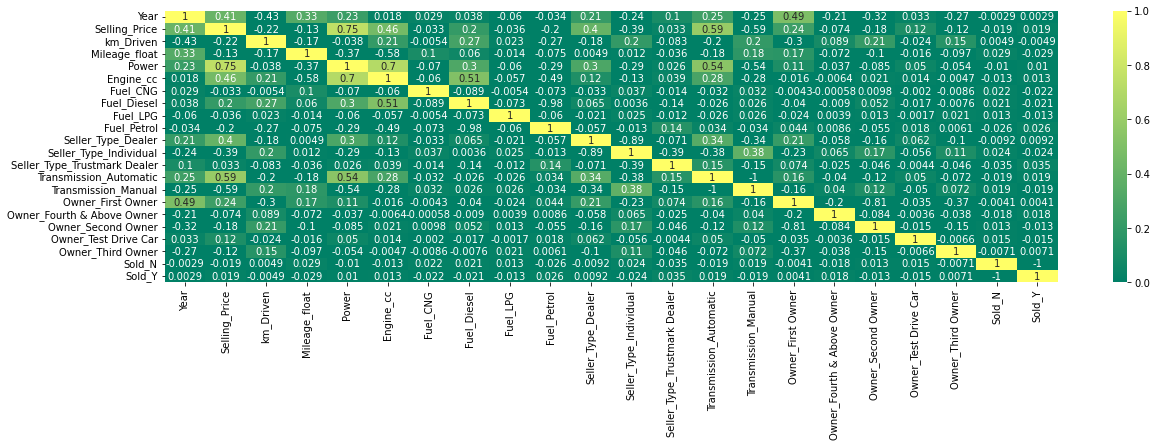

In [14]:
plt.figure(figsize=(20,5))
sb.heatmap(price.corr(),annot=True, cmap='summer', vmin=0, vmax=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x23baed32d00>,
 'caps': [<matplotlib.lines.Line2D at 0x23baed463a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23baed328b0>],
 'medians': [<matplotlib.lines.Line2D at 0x23baed46ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23baed46e50>],
 'means': []}

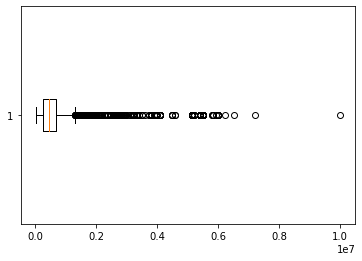

In [15]:
plt.boxplot(car_data['Selling_Price'], vert=False)

In [16]:
car_data1 =car_data.query("Sold =='Y'")
df = car_data1.groupby(['Brand'], as_index=False).agg(Total_Cars_Sold = ('Brand', 'count')).sort_values(['Total_Cars_Sold'],ascending=False)
df1 = df.head()
df1

,Brand,Total_Cars_Sold
17,Maruti,597
9,Hyundai,332
16,Mahindra,201
23,Tata,178
24,Toyota,126


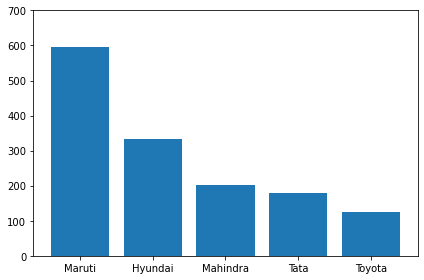

In [17]:
#df['Brand'].head()
#df.head()
plt.bar(df1['Brand'], df1['Total_Cars_Sold'])
plt.ylim(0, 700)
plt.tight_layout()
plt.show()

C:\Users\lbansal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State_Name', ylabel='count'>

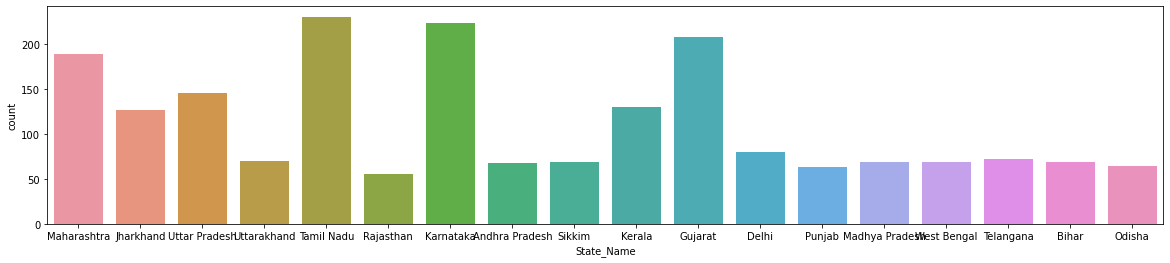

In [18]:
plt.figure(figsize=(20,4))
sb.countplot(car_data1["State_Name"])

In [19]:
df_state = car_data1.groupby(['State_Name'], as_index=False).agg(Total_Cars_Sold = ('State_Name', 'count')).sort_values(['Total_Cars_Sold'],ascending=False)
df2 = df_state.head()
df2

,State_Name,Total_Cars_Sold
13,Tamil Nadu,230
5,Karnataka,223
3,Gujarat,208
8,Maharashtra,189
15,Uttar Pradesh,145


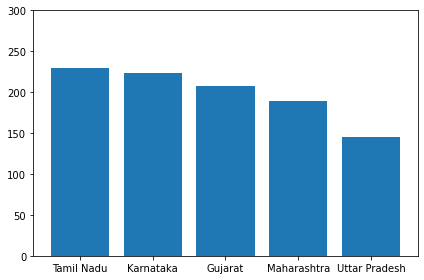

In [20]:
plt.bar(df2['State_Name'], df2['Total_Cars_Sold'])
plt.ylim(0, 300)
plt.tight_layout()
plt.show()

C:\Users\lbansal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Name', ylabel='count'>

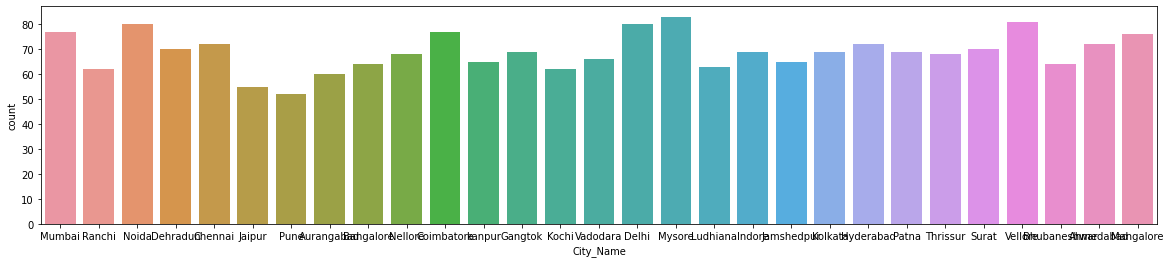

In [21]:
plt.figure(figsize=(20,4))
sb.countplot(car_data1["City_Name"])

In [22]:
df_city = car_data1.groupby(['State_Name','City_Name'], as_index=False).agg(Total_Cars_Sold = ('City_Name', 'count')).sort_values(['Total_Cars_Sold'],ascending=False)
df3 = df_city.head(10)
df3

,State_Name,City_Name,Total_Cars_Sold
10,Karnataka,Mysore,83
23,Tamil Nadu,Vellore,81
2,Delhi,Delhi,80
25,Uttar Pradesh,Noida,80
22,Tamil Nadu,Coimbatore,77
15,Maharashtra,Mumbai,77
9,Karnataka,Mangalore,76
3,Gujarat,Ahmedabad,72
24,Telangana,Hyderabad,72
21,Tamil Nadu,Chennai,72


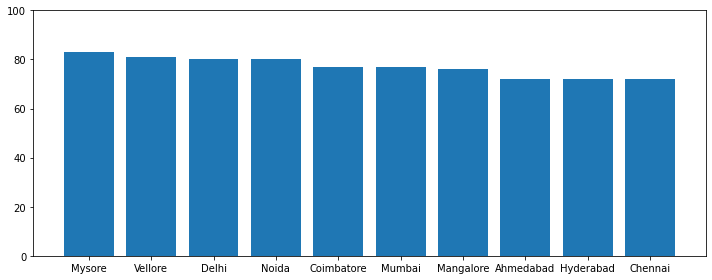

In [23]:
plt.figure(figsize=(10,4))
plt.bar(df3['City_Name'], df3['Total_Cars_Sold'])
plt.ylim(0, 100)
plt.tight_layout()
plt.show()